In [1]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
class NeuralNetwork:
    
    def __init__(self,n_features,n_output_classes,layers):
        np.random.seed(5)
        
        model = {}
        
#         layer1
        model['w1'] = np.random.randn(n_features,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
#         layer2
        model['w2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
#         outputlayer
        model['w3'] = np.random.randn(layers[1],n_output_classes)
        model['b3'] = np.zeros((1,n_output_classes))
        
        self.model = model  
        
    def softmax(self,x):
        return (np.exp(x))/(1+np.sum(np.exp(x),axis=1,keepdims=True))
        
    def forward_prop(self,x):
        
        w1= self.model['w1']
        w2 = self.model['w2']
        w3 = self.model['w3']
        
        b1 = self.model['b1']
        b2 = self.model['b2']
        b3 = self.model['b3']
        
        softmax = self.softmax
        
        
        z1 = np.dot(x,w1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,w2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,w3) + b3
        output = softmax(z3)
        
        self.activation_output = (a1,a2,output)
        return output
        
        
    def predic(self,x):
        y_ = self.forward_prop(x)
        return np.argmax(y_,axis = 1)
        
    def back_prop(self,x,y,lr=0.0001):
        
        w1= self.model['w1']
        w2 = self.model['w2']
        w3 = self.model['w3']
        
        b1 = self.model['b1']
        b2 = self.model['b2']
        b3 = self.model['b3']
    
        m = x.shape[0]
        a1,a2,y_ = self.activation_output
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,w3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,w2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        
        
        self.model['w1'] -= lr*dw1
        self.model['b1'] -= lr*db1
        
        
        self.model['w2'] -= lr*dw2
        self.model['b2'] -= lr*db2
        
        self.model['w3'] -= lr*dw3
        self.model['b3'] -= lr*db3
        
        
        
    def summary(self):
        
        print("Model summary")
        
        print("W1",self.model['w1'].shape)
        print("A1",self.activation_output[0].shape)
        
        
        print("W2",self.model['w2'].shape)
        print("A2",self.activation_output[1].shape)
        
        print("W3",self.model['w3'].shape)
        print("OUt",self.activation_output[2].shape)

In [3]:
def los(y_out,p):
    l = -np.mean( y_out * np.log(p))
    return l
    
def one_hot(y,n_classes):
    on_ht = np.zeros((y.shape[0],n_classes))
    on_ht[range(y.shape[0]),y] = 1
    return on_ht

In [4]:
x,y = make_circles(n_samples = 500,shuffle = True, noise =0.05, random_state = 1,factor=0.8)
y_oht = one_hot(y,2)
print(y_oht.shape)
# print(y_oht)

(500, 2)


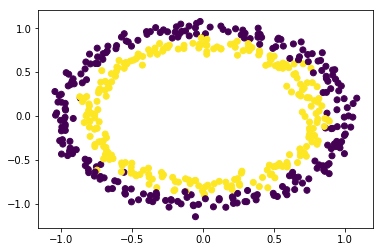

In [5]:
plt.scatter(x[:,0],x[:,1],c = y)

In [18]:
model = NeuralNetwork(2,2,[10,5])

In [19]:
def train(x,y,model,epochs = 15000,lr = 0.0001,logs=True):
    
    loss = [] 
    n_classes = 2 
    y_oht = one_hot(y,n_classes)
    
    for ix in range(epochs):
        Y_ = model.forward_prop(x)
        temp_loss = los(y_oht,Y_)
        model.back_prop(x,y_oht,lr)
        
        if(logs):
            print("%d epoch, %.4f loss"%(ix,temp_loss))
            
        loss.append(temp_loss)
        
    return loss,model

In [20]:
losses,model = train(x,y,model)

0 epoch, 0.7564 loss
1 epoch, 0.7232 loss
2 epoch, 0.6961 loss
3 epoch, 0.6736 loss
4 epoch, 0.6550 loss
5 epoch, 0.6394 loss
6 epoch, 0.6265 loss
7 epoch, 0.6157 loss
8 epoch, 0.6067 loss
9 epoch, 0.5992 loss
10 epoch, 0.5930 loss
11 epoch, 0.5877 loss
12 epoch, 0.5834 loss
13 epoch, 0.5797 loss
14 epoch, 0.5766 loss
15 epoch, 0.5740 loss
16 epoch, 0.5718 loss
17 epoch, 0.5699 loss
18 epoch, 0.5683 loss
19 epoch, 0.5669 loss
20 epoch, 0.5657 loss
21 epoch, 0.5647 loss
22 epoch, 0.5637 loss
23 epoch, 0.5629 loss
24 epoch, 0.5622 loss
25 epoch, 0.5616 loss
26 epoch, 0.5610 loss
27 epoch, 0.5605 loss
28 epoch, 0.5600 loss
29 epoch, 0.5596 loss
30 epoch, 0.5593 loss
31 epoch, 0.5589 loss
32 epoch, 0.5586 loss
33 epoch, 0.5583 loss
34 epoch, 0.5580 loss
35 epoch, 0.5578 loss
36 epoch, 0.5576 loss
37 epoch, 0.5574 loss
38 epoch, 0.5572 loss
39 epoch, 0.5570 loss
40 epoch, 0.5568 loss
41 epoch, 0.5566 loss
42 epoch, 0.5565 loss
43 epoch, 0.5563 loss
44 epoch, 0.5562 loss
45 epoch, 0.5561 los

384 epoch, 0.5463 loss
385 epoch, 0.5463 loss
386 epoch, 0.5463 loss
387 epoch, 0.5463 loss
388 epoch, 0.5463 loss
389 epoch, 0.5463 loss
390 epoch, 0.5462 loss
391 epoch, 0.5462 loss
392 epoch, 0.5462 loss
393 epoch, 0.5462 loss
394 epoch, 0.5462 loss
395 epoch, 0.5462 loss
396 epoch, 0.5461 loss
397 epoch, 0.5461 loss
398 epoch, 0.5461 loss
399 epoch, 0.5461 loss
400 epoch, 0.5461 loss
401 epoch, 0.5461 loss
402 epoch, 0.5461 loss
403 epoch, 0.5460 loss
404 epoch, 0.5460 loss
405 epoch, 0.5460 loss
406 epoch, 0.5460 loss
407 epoch, 0.5460 loss
408 epoch, 0.5460 loss
409 epoch, 0.5459 loss
410 epoch, 0.5459 loss
411 epoch, 0.5459 loss
412 epoch, 0.5459 loss
413 epoch, 0.5459 loss
414 epoch, 0.5459 loss
415 epoch, 0.5458 loss
416 epoch, 0.5458 loss
417 epoch, 0.5458 loss
418 epoch, 0.5458 loss
419 epoch, 0.5458 loss
420 epoch, 0.5458 loss
421 epoch, 0.5457 loss
422 epoch, 0.5457 loss
423 epoch, 0.5457 loss
424 epoch, 0.5457 loss
425 epoch, 0.5457 loss
426 epoch, 0.5457 loss
427 epoch, 

779 epoch, 0.5377 loss
780 epoch, 0.5377 loss
781 epoch, 0.5377 loss
782 epoch, 0.5376 loss
783 epoch, 0.5376 loss
784 epoch, 0.5376 loss
785 epoch, 0.5375 loss
786 epoch, 0.5375 loss
787 epoch, 0.5375 loss
788 epoch, 0.5374 loss
789 epoch, 0.5374 loss
790 epoch, 0.5374 loss
791 epoch, 0.5373 loss
792 epoch, 0.5373 loss
793 epoch, 0.5373 loss
794 epoch, 0.5372 loss
795 epoch, 0.5372 loss
796 epoch, 0.5372 loss
797 epoch, 0.5371 loss
798 epoch, 0.5371 loss
799 epoch, 0.5371 loss
800 epoch, 0.5370 loss
801 epoch, 0.5370 loss
802 epoch, 0.5370 loss
803 epoch, 0.5369 loss
804 epoch, 0.5369 loss
805 epoch, 0.5369 loss
806 epoch, 0.5368 loss
807 epoch, 0.5368 loss
808 epoch, 0.5368 loss
809 epoch, 0.5367 loss
810 epoch, 0.5367 loss
811 epoch, 0.5367 loss
812 epoch, 0.5366 loss
813 epoch, 0.5366 loss
814 epoch, 0.5366 loss
815 epoch, 0.5365 loss
816 epoch, 0.5365 loss
817 epoch, 0.5364 loss
818 epoch, 0.5364 loss
819 epoch, 0.5364 loss
820 epoch, 0.5363 loss
821 epoch, 0.5363 loss
822 epoch, 

1191 epoch, 0.5137 loss
1192 epoch, 0.5136 loss
1193 epoch, 0.5135 loss
1194 epoch, 0.5134 loss
1195 epoch, 0.5133 loss
1196 epoch, 0.5132 loss
1197 epoch, 0.5131 loss
1198 epoch, 0.5130 loss
1199 epoch, 0.5129 loss
1200 epoch, 0.5128 loss
1201 epoch, 0.5127 loss
1202 epoch, 0.5126 loss
1203 epoch, 0.5125 loss
1204 epoch, 0.5124 loss
1205 epoch, 0.5123 loss
1206 epoch, 0.5122 loss
1207 epoch, 0.5121 loss
1208 epoch, 0.5120 loss
1209 epoch, 0.5119 loss
1210 epoch, 0.5118 loss
1211 epoch, 0.5117 loss
1212 epoch, 0.5116 loss
1213 epoch, 0.5115 loss
1214 epoch, 0.5114 loss
1215 epoch, 0.5113 loss
1216 epoch, 0.5112 loss
1217 epoch, 0.5111 loss
1218 epoch, 0.5110 loss
1219 epoch, 0.5109 loss
1220 epoch, 0.5108 loss
1221 epoch, 0.5107 loss
1222 epoch, 0.5106 loss
1223 epoch, 0.5105 loss
1224 epoch, 0.5104 loss
1225 epoch, 0.5103 loss
1226 epoch, 0.5102 loss
1227 epoch, 0.5101 loss
1228 epoch, 0.5100 loss
1229 epoch, 0.5099 loss
1230 epoch, 0.5098 loss
1231 epoch, 0.5097 loss
1232 epoch, 0.50

1633 epoch, 0.4445 loss
1634 epoch, 0.4443 loss
1635 epoch, 0.4441 loss
1636 epoch, 0.4439 loss
1637 epoch, 0.4437 loss
1638 epoch, 0.4435 loss
1639 epoch, 0.4433 loss
1640 epoch, 0.4431 loss
1641 epoch, 0.4429 loss
1642 epoch, 0.4427 loss
1643 epoch, 0.4425 loss
1644 epoch, 0.4423 loss
1645 epoch, 0.4421 loss
1646 epoch, 0.4419 loss
1647 epoch, 0.4417 loss
1648 epoch, 0.4415 loss
1649 epoch, 0.4413 loss
1650 epoch, 0.4411 loss
1651 epoch, 0.4409 loss
1652 epoch, 0.4407 loss
1653 epoch, 0.4405 loss
1654 epoch, 0.4402 loss
1655 epoch, 0.4400 loss
1656 epoch, 0.4398 loss
1657 epoch, 0.4396 loss
1658 epoch, 0.4394 loss
1659 epoch, 0.4392 loss
1660 epoch, 0.4390 loss
1661 epoch, 0.4388 loss
1662 epoch, 0.4386 loss
1663 epoch, 0.4384 loss
1664 epoch, 0.4382 loss
1665 epoch, 0.4380 loss
1666 epoch, 0.4378 loss
1667 epoch, 0.4376 loss
1668 epoch, 0.4375 loss
1669 epoch, 0.4373 loss
1670 epoch, 0.4371 loss
1671 epoch, 0.4369 loss
1672 epoch, 0.4367 loss
1673 epoch, 0.4365 loss
1674 epoch, 0.43

2070 epoch, 0.3802 loss
2071 epoch, 0.3801 loss
2072 epoch, 0.3800 loss
2073 epoch, 0.3799 loss
2074 epoch, 0.3798 loss
2075 epoch, 0.3798 loss
2076 epoch, 0.3797 loss
2077 epoch, 0.3796 loss
2078 epoch, 0.3795 loss
2079 epoch, 0.3794 loss
2080 epoch, 0.3793 loss
2081 epoch, 0.3793 loss
2082 epoch, 0.3792 loss
2083 epoch, 0.3791 loss
2084 epoch, 0.3790 loss
2085 epoch, 0.3789 loss
2086 epoch, 0.3789 loss
2087 epoch, 0.3788 loss
2088 epoch, 0.3787 loss
2089 epoch, 0.3786 loss
2090 epoch, 0.3785 loss
2091 epoch, 0.3784 loss
2092 epoch, 0.3784 loss
2093 epoch, 0.3783 loss
2094 epoch, 0.3782 loss
2095 epoch, 0.3781 loss
2096 epoch, 0.3780 loss
2097 epoch, 0.3780 loss
2098 epoch, 0.3779 loss
2099 epoch, 0.3778 loss
2100 epoch, 0.3777 loss
2101 epoch, 0.3777 loss
2102 epoch, 0.3776 loss
2103 epoch, 0.3775 loss
2104 epoch, 0.3774 loss
2105 epoch, 0.3773 loss
2106 epoch, 0.3773 loss
2107 epoch, 0.3772 loss
2108 epoch, 0.3771 loss
2109 epoch, 0.3770 loss
2110 epoch, 0.3770 loss
2111 epoch, 0.37

2494 epoch, 0.3575 loss
2495 epoch, 0.3575 loss
2496 epoch, 0.3575 loss
2497 epoch, 0.3574 loss
2498 epoch, 0.3574 loss
2499 epoch, 0.3574 loss
2500 epoch, 0.3573 loss
2501 epoch, 0.3573 loss
2502 epoch, 0.3573 loss
2503 epoch, 0.3572 loss
2504 epoch, 0.3572 loss
2505 epoch, 0.3572 loss
2506 epoch, 0.3572 loss
2507 epoch, 0.3571 loss
2508 epoch, 0.3571 loss
2509 epoch, 0.3571 loss
2510 epoch, 0.3570 loss
2511 epoch, 0.3570 loss
2512 epoch, 0.3570 loss
2513 epoch, 0.3569 loss
2514 epoch, 0.3569 loss
2515 epoch, 0.3569 loss
2516 epoch, 0.3568 loss
2517 epoch, 0.3568 loss
2518 epoch, 0.3568 loss
2519 epoch, 0.3567 loss
2520 epoch, 0.3567 loss
2521 epoch, 0.3567 loss
2522 epoch, 0.3566 loss
2523 epoch, 0.3566 loss
2524 epoch, 0.3566 loss
2525 epoch, 0.3565 loss
2526 epoch, 0.3565 loss
2527 epoch, 0.3565 loss
2528 epoch, 0.3564 loss
2529 epoch, 0.3564 loss
2530 epoch, 0.3564 loss
2531 epoch, 0.3563 loss
2532 epoch, 0.3563 loss
2533 epoch, 0.3563 loss
2534 epoch, 0.3563 loss
2535 epoch, 0.35

2906 epoch, 0.3467 loss
2907 epoch, 0.3467 loss
2908 epoch, 0.3467 loss
2909 epoch, 0.3466 loss
2910 epoch, 0.3466 loss
2911 epoch, 0.3466 loss
2912 epoch, 0.3466 loss
2913 epoch, 0.3466 loss
2914 epoch, 0.3465 loss
2915 epoch, 0.3465 loss
2916 epoch, 0.3465 loss
2917 epoch, 0.3465 loss
2918 epoch, 0.3464 loss
2919 epoch, 0.3464 loss
2920 epoch, 0.3464 loss
2921 epoch, 0.3464 loss
2922 epoch, 0.3464 loss
2923 epoch, 0.3463 loss
2924 epoch, 0.3463 loss
2925 epoch, 0.3463 loss
2926 epoch, 0.3463 loss
2927 epoch, 0.3462 loss
2928 epoch, 0.3462 loss
2929 epoch, 0.3462 loss
2930 epoch, 0.3462 loss
2931 epoch, 0.3462 loss
2932 epoch, 0.3461 loss
2933 epoch, 0.3461 loss
2934 epoch, 0.3461 loss
2935 epoch, 0.3461 loss
2936 epoch, 0.3460 loss
2937 epoch, 0.3460 loss
2938 epoch, 0.3460 loss
2939 epoch, 0.3460 loss
2940 epoch, 0.3460 loss
2941 epoch, 0.3459 loss
2942 epoch, 0.3459 loss
2943 epoch, 0.3459 loss
2944 epoch, 0.3459 loss
2945 epoch, 0.3458 loss
2946 epoch, 0.3458 loss
2947 epoch, 0.34

3309 epoch, 0.3380 loss
3310 epoch, 0.3380 loss
3311 epoch, 0.3380 loss
3312 epoch, 0.3379 loss
3313 epoch, 0.3379 loss
3314 epoch, 0.3379 loss
3315 epoch, 0.3379 loss
3316 epoch, 0.3378 loss
3317 epoch, 0.3378 loss
3318 epoch, 0.3378 loss
3319 epoch, 0.3378 loss
3320 epoch, 0.3378 loss
3321 epoch, 0.3377 loss
3322 epoch, 0.3377 loss
3323 epoch, 0.3377 loss
3324 epoch, 0.3377 loss
3325 epoch, 0.3376 loss
3326 epoch, 0.3376 loss
3327 epoch, 0.3376 loss
3328 epoch, 0.3376 loss
3329 epoch, 0.3376 loss
3330 epoch, 0.3375 loss
3331 epoch, 0.3375 loss
3332 epoch, 0.3375 loss
3333 epoch, 0.3375 loss
3334 epoch, 0.3375 loss
3335 epoch, 0.3374 loss
3336 epoch, 0.3374 loss
3337 epoch, 0.3374 loss
3338 epoch, 0.3374 loss
3339 epoch, 0.3373 loss
3340 epoch, 0.3373 loss
3341 epoch, 0.3373 loss
3342 epoch, 0.3373 loss
3343 epoch, 0.3373 loss
3344 epoch, 0.3372 loss
3345 epoch, 0.3372 loss
3346 epoch, 0.3372 loss
3347 epoch, 0.3372 loss
3348 epoch, 0.3371 loss
3349 epoch, 0.3371 loss
3350 epoch, 0.33

3712 epoch, 0.3290 loss
3713 epoch, 0.3289 loss
3714 epoch, 0.3289 loss
3715 epoch, 0.3289 loss
3716 epoch, 0.3289 loss
3717 epoch, 0.3288 loss
3718 epoch, 0.3288 loss
3719 epoch, 0.3288 loss
3720 epoch, 0.3288 loss
3721 epoch, 0.3287 loss
3722 epoch, 0.3287 loss
3723 epoch, 0.3287 loss
3724 epoch, 0.3287 loss
3725 epoch, 0.3287 loss
3726 epoch, 0.3286 loss
3727 epoch, 0.3286 loss
3728 epoch, 0.3286 loss
3729 epoch, 0.3286 loss
3730 epoch, 0.3285 loss
3731 epoch, 0.3285 loss
3732 epoch, 0.3285 loss
3733 epoch, 0.3285 loss
3734 epoch, 0.3284 loss
3735 epoch, 0.3284 loss
3736 epoch, 0.3284 loss
3737 epoch, 0.3284 loss
3738 epoch, 0.3283 loss
3739 epoch, 0.3283 loss
3740 epoch, 0.3283 loss
3741 epoch, 0.3283 loss
3742 epoch, 0.3283 loss
3743 epoch, 0.3282 loss
3744 epoch, 0.3282 loss
3745 epoch, 0.3282 loss
3746 epoch, 0.3282 loss
3747 epoch, 0.3281 loss
3748 epoch, 0.3281 loss
3749 epoch, 0.3281 loss
3750 epoch, 0.3281 loss
3751 epoch, 0.3280 loss
3752 epoch, 0.3280 loss
3753 epoch, 0.32

4135 epoch, 0.3185 loss
4136 epoch, 0.3185 loss
4137 epoch, 0.3185 loss
4138 epoch, 0.3185 loss
4139 epoch, 0.3184 loss
4140 epoch, 0.3184 loss
4141 epoch, 0.3184 loss
4142 epoch, 0.3184 loss
4143 epoch, 0.3183 loss
4144 epoch, 0.3183 loss
4145 epoch, 0.3183 loss
4146 epoch, 0.3182 loss
4147 epoch, 0.3182 loss
4148 epoch, 0.3182 loss
4149 epoch, 0.3182 loss
4150 epoch, 0.3181 loss
4151 epoch, 0.3181 loss
4152 epoch, 0.3181 loss
4153 epoch, 0.3181 loss
4154 epoch, 0.3180 loss
4155 epoch, 0.3180 loss
4156 epoch, 0.3180 loss
4157 epoch, 0.3180 loss
4158 epoch, 0.3179 loss
4159 epoch, 0.3179 loss
4160 epoch, 0.3179 loss
4161 epoch, 0.3178 loss
4162 epoch, 0.3178 loss
4163 epoch, 0.3178 loss
4164 epoch, 0.3178 loss
4165 epoch, 0.3177 loss
4166 epoch, 0.3177 loss
4167 epoch, 0.3177 loss
4168 epoch, 0.3177 loss
4169 epoch, 0.3176 loss
4170 epoch, 0.3176 loss
4171 epoch, 0.3176 loss
4172 epoch, 0.3175 loss
4173 epoch, 0.3175 loss
4174 epoch, 0.3175 loss
4175 epoch, 0.3175 loss
4176 epoch, 0.31

4557 epoch, 0.3056 loss
4558 epoch, 0.3056 loss
4559 epoch, 0.3055 loss
4560 epoch, 0.3055 loss
4561 epoch, 0.3054 loss
4562 epoch, 0.3054 loss
4563 epoch, 0.3054 loss
4564 epoch, 0.3053 loss
4565 epoch, 0.3053 loss
4566 epoch, 0.3053 loss
4567 epoch, 0.3052 loss
4568 epoch, 0.3052 loss
4569 epoch, 0.3052 loss
4570 epoch, 0.3051 loss
4571 epoch, 0.3051 loss
4572 epoch, 0.3050 loss
4573 epoch, 0.3050 loss
4574 epoch, 0.3050 loss
4575 epoch, 0.3049 loss
4576 epoch, 0.3049 loss
4577 epoch, 0.3049 loss
4578 epoch, 0.3048 loss
4579 epoch, 0.3048 loss
4580 epoch, 0.3047 loss
4581 epoch, 0.3047 loss
4582 epoch, 0.3047 loss
4583 epoch, 0.3046 loss
4584 epoch, 0.3046 loss
4585 epoch, 0.3046 loss
4586 epoch, 0.3045 loss
4587 epoch, 0.3045 loss
4588 epoch, 0.3044 loss
4589 epoch, 0.3044 loss
4590 epoch, 0.3044 loss
4591 epoch, 0.3043 loss
4592 epoch, 0.3043 loss
4593 epoch, 0.3043 loss
4594 epoch, 0.3042 loss
4595 epoch, 0.3042 loss
4596 epoch, 0.3041 loss
4597 epoch, 0.3041 loss
4598 epoch, 0.30

4980 epoch, 0.2870 loss
4981 epoch, 0.2869 loss
4982 epoch, 0.2868 loss
4983 epoch, 0.2868 loss
4984 epoch, 0.2867 loss
4985 epoch, 0.2867 loss
4986 epoch, 0.2866 loss
4987 epoch, 0.2866 loss
4988 epoch, 0.2865 loss
4989 epoch, 0.2865 loss
4990 epoch, 0.2864 loss
4991 epoch, 0.2864 loss
4992 epoch, 0.2863 loss
4993 epoch, 0.2863 loss
4994 epoch, 0.2862 loss
4995 epoch, 0.2862 loss
4996 epoch, 0.2861 loss
4997 epoch, 0.2861 loss
4998 epoch, 0.2860 loss
4999 epoch, 0.2860 loss
5000 epoch, 0.2859 loss
5001 epoch, 0.2858 loss
5002 epoch, 0.2858 loss
5003 epoch, 0.2857 loss
5004 epoch, 0.2857 loss
5005 epoch, 0.2856 loss
5006 epoch, 0.2856 loss
5007 epoch, 0.2855 loss
5008 epoch, 0.2855 loss
5009 epoch, 0.2854 loss
5010 epoch, 0.2854 loss
5011 epoch, 0.2853 loss
5012 epoch, 0.2853 loss
5013 epoch, 0.2852 loss
5014 epoch, 0.2852 loss
5015 epoch, 0.2851 loss
5016 epoch, 0.2850 loss
5017 epoch, 0.2850 loss
5018 epoch, 0.2849 loss
5019 epoch, 0.2849 loss
5020 epoch, 0.2848 loss
5021 epoch, 0.28

5372 epoch, 0.2635 loss
5373 epoch, 0.2635 loss
5374 epoch, 0.2634 loss
5375 epoch, 0.2633 loss
5376 epoch, 0.2633 loss
5377 epoch, 0.2632 loss
5378 epoch, 0.2631 loss
5379 epoch, 0.2631 loss
5380 epoch, 0.2630 loss
5381 epoch, 0.2629 loss
5382 epoch, 0.2629 loss
5383 epoch, 0.2628 loss
5384 epoch, 0.2627 loss
5385 epoch, 0.2627 loss
5386 epoch, 0.2626 loss
5387 epoch, 0.2625 loss
5388 epoch, 0.2625 loss
5389 epoch, 0.2624 loss
5390 epoch, 0.2623 loss
5391 epoch, 0.2623 loss
5392 epoch, 0.2622 loss
5393 epoch, 0.2621 loss
5394 epoch, 0.2621 loss
5395 epoch, 0.2620 loss
5396 epoch, 0.2619 loss
5397 epoch, 0.2619 loss
5398 epoch, 0.2618 loss
5399 epoch, 0.2617 loss
5400 epoch, 0.2617 loss
5401 epoch, 0.2616 loss
5402 epoch, 0.2615 loss
5403 epoch, 0.2615 loss
5404 epoch, 0.2614 loss
5405 epoch, 0.2613 loss
5406 epoch, 0.2613 loss
5407 epoch, 0.2612 loss
5408 epoch, 0.2611 loss
5409 epoch, 0.2611 loss
5410 epoch, 0.2610 loss
5411 epoch, 0.2609 loss
5412 epoch, 0.2608 loss
5413 epoch, 0.26

5792 epoch, 0.2346 loss
5793 epoch, 0.2345 loss
5794 epoch, 0.2344 loss
5795 epoch, 0.2344 loss
5796 epoch, 0.2343 loss
5797 epoch, 0.2342 loss
5798 epoch, 0.2342 loss
5799 epoch, 0.2341 loss
5800 epoch, 0.2340 loss
5801 epoch, 0.2339 loss
5802 epoch, 0.2339 loss
5803 epoch, 0.2338 loss
5804 epoch, 0.2337 loss
5805 epoch, 0.2337 loss
5806 epoch, 0.2336 loss
5807 epoch, 0.2335 loss
5808 epoch, 0.2335 loss
5809 epoch, 0.2334 loss
5810 epoch, 0.2333 loss
5811 epoch, 0.2333 loss
5812 epoch, 0.2332 loss
5813 epoch, 0.2331 loss
5814 epoch, 0.2331 loss
5815 epoch, 0.2330 loss
5816 epoch, 0.2329 loss
5817 epoch, 0.2329 loss
5818 epoch, 0.2328 loss
5819 epoch, 0.2327 loss
5820 epoch, 0.2327 loss
5821 epoch, 0.2326 loss
5822 epoch, 0.2325 loss
5823 epoch, 0.2324 loss
5824 epoch, 0.2324 loss
5825 epoch, 0.2323 loss
5826 epoch, 0.2322 loss
5827 epoch, 0.2322 loss
5828 epoch, 0.2321 loss
5829 epoch, 0.2320 loss
5830 epoch, 0.2320 loss
5831 epoch, 0.2319 loss
5832 epoch, 0.2318 loss
5833 epoch, 0.23

6202 epoch, 0.2082 loss
6203 epoch, 0.2081 loss
6204 epoch, 0.2081 loss
6205 epoch, 0.2080 loss
6206 epoch, 0.2080 loss
6207 epoch, 0.2079 loss
6208 epoch, 0.2078 loss
6209 epoch, 0.2078 loss
6210 epoch, 0.2077 loss
6211 epoch, 0.2077 loss
6212 epoch, 0.2076 loss
6213 epoch, 0.2075 loss
6214 epoch, 0.2075 loss
6215 epoch, 0.2074 loss
6216 epoch, 0.2074 loss
6217 epoch, 0.2073 loss
6218 epoch, 0.2072 loss
6219 epoch, 0.2072 loss
6220 epoch, 0.2071 loss
6221 epoch, 0.2071 loss
6222 epoch, 0.2070 loss
6223 epoch, 0.2070 loss
6224 epoch, 0.2069 loss
6225 epoch, 0.2068 loss
6226 epoch, 0.2068 loss
6227 epoch, 0.2067 loss
6228 epoch, 0.2067 loss
6229 epoch, 0.2066 loss
6230 epoch, 0.2065 loss
6231 epoch, 0.2065 loss
6232 epoch, 0.2064 loss
6233 epoch, 0.2064 loss
6234 epoch, 0.2063 loss
6235 epoch, 0.2062 loss
6236 epoch, 0.2062 loss
6237 epoch, 0.2061 loss
6238 epoch, 0.2061 loss
6239 epoch, 0.2060 loss
6240 epoch, 0.2060 loss
6241 epoch, 0.2059 loss
6242 epoch, 0.2058 loss
6243 epoch, 0.20

6585 epoch, 0.1872 loss
6586 epoch, 0.1872 loss
6587 epoch, 0.1871 loss
6588 epoch, 0.1871 loss
6589 epoch, 0.1870 loss
6590 epoch, 0.1870 loss
6591 epoch, 0.1869 loss
6592 epoch, 0.1869 loss
6593 epoch, 0.1868 loss
6594 epoch, 0.1868 loss
6595 epoch, 0.1867 loss
6596 epoch, 0.1866 loss
6597 epoch, 0.1866 loss
6598 epoch, 0.1865 loss
6599 epoch, 0.1865 loss
6600 epoch, 0.1864 loss
6601 epoch, 0.1864 loss
6602 epoch, 0.1863 loss
6603 epoch, 0.1863 loss
6604 epoch, 0.1862 loss
6605 epoch, 0.1862 loss
6606 epoch, 0.1861 loss
6607 epoch, 0.1861 loss
6608 epoch, 0.1860 loss
6609 epoch, 0.1860 loss
6610 epoch, 0.1859 loss
6611 epoch, 0.1859 loss
6612 epoch, 0.1858 loss
6613 epoch, 0.1858 loss
6614 epoch, 0.1857 loss
6615 epoch, 0.1857 loss
6616 epoch, 0.1856 loss
6617 epoch, 0.1856 loss
6618 epoch, 0.1855 loss
6619 epoch, 0.1855 loss
6620 epoch, 0.1854 loss
6621 epoch, 0.1854 loss
6622 epoch, 0.1853 loss
6623 epoch, 0.1853 loss
6624 epoch, 0.1852 loss
6625 epoch, 0.1852 loss
6626 epoch, 0.18

7014 epoch, 0.1664 loss
7015 epoch, 0.1664 loss
7016 epoch, 0.1663 loss
7017 epoch, 0.1663 loss
7018 epoch, 0.1662 loss
7019 epoch, 0.1662 loss
7020 epoch, 0.1661 loss
7021 epoch, 0.1661 loss
7022 epoch, 0.1660 loss
7023 epoch, 0.1660 loss
7024 epoch, 0.1660 loss
7025 epoch, 0.1659 loss
7026 epoch, 0.1659 loss
7027 epoch, 0.1658 loss
7028 epoch, 0.1658 loss
7029 epoch, 0.1657 loss
7030 epoch, 0.1657 loss
7031 epoch, 0.1656 loss
7032 epoch, 0.1656 loss
7033 epoch, 0.1655 loss
7034 epoch, 0.1655 loss
7035 epoch, 0.1654 loss
7036 epoch, 0.1654 loss
7037 epoch, 0.1654 loss
7038 epoch, 0.1653 loss
7039 epoch, 0.1653 loss
7040 epoch, 0.1652 loss
7041 epoch, 0.1652 loss
7042 epoch, 0.1651 loss
7043 epoch, 0.1651 loss
7044 epoch, 0.1650 loss
7045 epoch, 0.1650 loss
7046 epoch, 0.1649 loss
7047 epoch, 0.1649 loss
7048 epoch, 0.1648 loss
7049 epoch, 0.1648 loss
7050 epoch, 0.1647 loss
7051 epoch, 0.1647 loss
7052 epoch, 0.1647 loss
7053 epoch, 0.1646 loss
7054 epoch, 0.1646 loss
7055 epoch, 0.16

7437 epoch, 0.1475 loss
7438 epoch, 0.1474 loss
7439 epoch, 0.1474 loss
7440 epoch, 0.1473 loss
7441 epoch, 0.1473 loss
7442 epoch, 0.1472 loss
7443 epoch, 0.1472 loss
7444 epoch, 0.1472 loss
7445 epoch, 0.1471 loss
7446 epoch, 0.1471 loss
7447 epoch, 0.1470 loss
7448 epoch, 0.1470 loss
7449 epoch, 0.1469 loss
7450 epoch, 0.1469 loss
7451 epoch, 0.1469 loss
7452 epoch, 0.1468 loss
7453 epoch, 0.1468 loss
7454 epoch, 0.1467 loss
7455 epoch, 0.1467 loss
7456 epoch, 0.1466 loss
7457 epoch, 0.1466 loss
7458 epoch, 0.1466 loss
7459 epoch, 0.1465 loss
7460 epoch, 0.1465 loss
7461 epoch, 0.1464 loss
7462 epoch, 0.1464 loss
7463 epoch, 0.1464 loss
7464 epoch, 0.1463 loss
7465 epoch, 0.1463 loss
7466 epoch, 0.1462 loss
7467 epoch, 0.1462 loss
7468 epoch, 0.1461 loss
7469 epoch, 0.1461 loss
7470 epoch, 0.1461 loss
7471 epoch, 0.1460 loss
7472 epoch, 0.1460 loss
7473 epoch, 0.1459 loss
7474 epoch, 0.1459 loss
7475 epoch, 0.1459 loss
7476 epoch, 0.1458 loss
7477 epoch, 0.1458 loss
7478 epoch, 0.14

7859 epoch, 0.1312 loss
7860 epoch, 0.1311 loss
7861 epoch, 0.1311 loss
7862 epoch, 0.1311 loss
7863 epoch, 0.1310 loss
7864 epoch, 0.1310 loss
7865 epoch, 0.1310 loss
7866 epoch, 0.1309 loss
7867 epoch, 0.1309 loss
7868 epoch, 0.1308 loss
7869 epoch, 0.1308 loss
7870 epoch, 0.1308 loss
7871 epoch, 0.1307 loss
7872 epoch, 0.1307 loss
7873 epoch, 0.1307 loss
7874 epoch, 0.1306 loss
7875 epoch, 0.1306 loss
7876 epoch, 0.1306 loss
7877 epoch, 0.1305 loss
7878 epoch, 0.1305 loss
7879 epoch, 0.1305 loss
7880 epoch, 0.1304 loss
7881 epoch, 0.1304 loss
7882 epoch, 0.1304 loss
7883 epoch, 0.1303 loss
7884 epoch, 0.1303 loss
7885 epoch, 0.1303 loss
7886 epoch, 0.1302 loss
7887 epoch, 0.1302 loss
7888 epoch, 0.1302 loss
7889 epoch, 0.1301 loss
7890 epoch, 0.1301 loss
7891 epoch, 0.1301 loss
7892 epoch, 0.1300 loss
7893 epoch, 0.1300 loss
7894 epoch, 0.1300 loss
7895 epoch, 0.1299 loss
7896 epoch, 0.1299 loss
7897 epoch, 0.1299 loss
7898 epoch, 0.1298 loss
7899 epoch, 0.1298 loss
7900 epoch, 0.12

8295 epoch, 0.1179 loss
8296 epoch, 0.1179 loss
8297 epoch, 0.1178 loss
8298 epoch, 0.1178 loss
8299 epoch, 0.1178 loss
8300 epoch, 0.1177 loss
8301 epoch, 0.1177 loss
8302 epoch, 0.1177 loss
8303 epoch, 0.1177 loss
8304 epoch, 0.1176 loss
8305 epoch, 0.1176 loss
8306 epoch, 0.1176 loss
8307 epoch, 0.1176 loss
8308 epoch, 0.1175 loss
8309 epoch, 0.1175 loss
8310 epoch, 0.1175 loss
8311 epoch, 0.1175 loss
8312 epoch, 0.1174 loss
8313 epoch, 0.1174 loss
8314 epoch, 0.1174 loss
8315 epoch, 0.1174 loss
8316 epoch, 0.1173 loss
8317 epoch, 0.1173 loss
8318 epoch, 0.1173 loss
8319 epoch, 0.1172 loss
8320 epoch, 0.1172 loss
8321 epoch, 0.1172 loss
8322 epoch, 0.1172 loss
8323 epoch, 0.1171 loss
8324 epoch, 0.1171 loss
8325 epoch, 0.1171 loss
8326 epoch, 0.1171 loss
8327 epoch, 0.1170 loss
8328 epoch, 0.1170 loss
8329 epoch, 0.1170 loss
8330 epoch, 0.1170 loss
8331 epoch, 0.1169 loss
8332 epoch, 0.1169 loss
8333 epoch, 0.1169 loss
8334 epoch, 0.1169 loss
8335 epoch, 0.1168 loss
8336 epoch, 0.11

8649 epoch, 0.1093 loss
8650 epoch, 0.1093 loss
8651 epoch, 0.1093 loss
8652 epoch, 0.1092 loss
8653 epoch, 0.1092 loss
8654 epoch, 0.1092 loss
8655 epoch, 0.1092 loss
8656 epoch, 0.1091 loss
8657 epoch, 0.1091 loss
8658 epoch, 0.1091 loss
8659 epoch, 0.1091 loss
8660 epoch, 0.1091 loss
8661 epoch, 0.1090 loss
8662 epoch, 0.1090 loss
8663 epoch, 0.1090 loss
8664 epoch, 0.1090 loss
8665 epoch, 0.1090 loss
8666 epoch, 0.1089 loss
8667 epoch, 0.1089 loss
8668 epoch, 0.1089 loss
8669 epoch, 0.1089 loss
8670 epoch, 0.1088 loss
8671 epoch, 0.1088 loss
8672 epoch, 0.1088 loss
8673 epoch, 0.1088 loss
8674 epoch, 0.1088 loss
8675 epoch, 0.1087 loss
8676 epoch, 0.1087 loss
8677 epoch, 0.1087 loss
8678 epoch, 0.1087 loss
8679 epoch, 0.1086 loss
8680 epoch, 0.1086 loss
8681 epoch, 0.1086 loss
8682 epoch, 0.1086 loss
8683 epoch, 0.1086 loss
8684 epoch, 0.1085 loss
8685 epoch, 0.1085 loss
8686 epoch, 0.1085 loss
8687 epoch, 0.1085 loss
8688 epoch, 0.1085 loss
8689 epoch, 0.1084 loss
8690 epoch, 0.10

9070 epoch, 0.1010 loss
9071 epoch, 0.1009 loss
9072 epoch, 0.1009 loss
9073 epoch, 0.1009 loss
9074 epoch, 0.1009 loss
9075 epoch, 0.1009 loss
9076 epoch, 0.1009 loss
9077 epoch, 0.1008 loss
9078 epoch, 0.1008 loss
9079 epoch, 0.1008 loss
9080 epoch, 0.1008 loss
9081 epoch, 0.1008 loss
9082 epoch, 0.1008 loss
9083 epoch, 0.1007 loss
9084 epoch, 0.1007 loss
9085 epoch, 0.1007 loss
9086 epoch, 0.1007 loss
9087 epoch, 0.1007 loss
9088 epoch, 0.1006 loss
9089 epoch, 0.1006 loss
9090 epoch, 0.1006 loss
9091 epoch, 0.1006 loss
9092 epoch, 0.1006 loss
9093 epoch, 0.1006 loss
9094 epoch, 0.1005 loss
9095 epoch, 0.1005 loss
9096 epoch, 0.1005 loss
9097 epoch, 0.1005 loss
9098 epoch, 0.1005 loss
9099 epoch, 0.1005 loss
9100 epoch, 0.1004 loss
9101 epoch, 0.1004 loss
9102 epoch, 0.1004 loss
9103 epoch, 0.1004 loss
9104 epoch, 0.1004 loss
9105 epoch, 0.1003 loss
9106 epoch, 0.1003 loss
9107 epoch, 0.1003 loss
9108 epoch, 0.1003 loss
9109 epoch, 0.1003 loss
9110 epoch, 0.1003 loss
9111 epoch, 0.10

9479 epoch, 0.0943 loss
9480 epoch, 0.0943 loss
9481 epoch, 0.0943 loss
9482 epoch, 0.0942 loss
9483 epoch, 0.0942 loss
9484 epoch, 0.0942 loss
9485 epoch, 0.0942 loss
9486 epoch, 0.0942 loss
9487 epoch, 0.0942 loss
9488 epoch, 0.0941 loss
9489 epoch, 0.0941 loss
9490 epoch, 0.0941 loss
9491 epoch, 0.0941 loss
9492 epoch, 0.0941 loss
9493 epoch, 0.0941 loss
9494 epoch, 0.0941 loss
9495 epoch, 0.0940 loss
9496 epoch, 0.0940 loss
9497 epoch, 0.0940 loss
9498 epoch, 0.0940 loss
9499 epoch, 0.0940 loss
9500 epoch, 0.0940 loss
9501 epoch, 0.0940 loss
9502 epoch, 0.0939 loss
9503 epoch, 0.0939 loss
9504 epoch, 0.0939 loss
9505 epoch, 0.0939 loss
9506 epoch, 0.0939 loss
9507 epoch, 0.0939 loss
9508 epoch, 0.0939 loss
9509 epoch, 0.0938 loss
9510 epoch, 0.0938 loss
9511 epoch, 0.0938 loss
9512 epoch, 0.0938 loss
9513 epoch, 0.0938 loss
9514 epoch, 0.0938 loss
9515 epoch, 0.0937 loss
9516 epoch, 0.0937 loss
9517 epoch, 0.0937 loss
9518 epoch, 0.0937 loss
9519 epoch, 0.0937 loss
9520 epoch, 0.09

9906 epoch, 0.0884 loss
9907 epoch, 0.0884 loss
9908 epoch, 0.0884 loss
9909 epoch, 0.0884 loss
9910 epoch, 0.0883 loss
9911 epoch, 0.0883 loss
9912 epoch, 0.0883 loss
9913 epoch, 0.0883 loss
9914 epoch, 0.0883 loss
9915 epoch, 0.0883 loss
9916 epoch, 0.0883 loss
9917 epoch, 0.0883 loss
9918 epoch, 0.0882 loss
9919 epoch, 0.0882 loss
9920 epoch, 0.0882 loss
9921 epoch, 0.0882 loss
9922 epoch, 0.0882 loss
9923 epoch, 0.0882 loss
9924 epoch, 0.0882 loss
9925 epoch, 0.0881 loss
9926 epoch, 0.0881 loss
9927 epoch, 0.0881 loss
9928 epoch, 0.0881 loss
9929 epoch, 0.0881 loss
9930 epoch, 0.0881 loss
9931 epoch, 0.0881 loss
9932 epoch, 0.0881 loss
9933 epoch, 0.0880 loss
9934 epoch, 0.0880 loss
9935 epoch, 0.0880 loss
9936 epoch, 0.0880 loss
9937 epoch, 0.0880 loss
9938 epoch, 0.0880 loss
9939 epoch, 0.0880 loss
9940 epoch, 0.0880 loss
9941 epoch, 0.0879 loss
9942 epoch, 0.0879 loss
9943 epoch, 0.0879 loss
9944 epoch, 0.0879 loss
9945 epoch, 0.0879 loss
9946 epoch, 0.0879 loss
9947 epoch, 0.08

10313 epoch, 0.0836 loss
10314 epoch, 0.0836 loss
10315 epoch, 0.0835 loss
10316 epoch, 0.0835 loss
10317 epoch, 0.0835 loss
10318 epoch, 0.0835 loss
10319 epoch, 0.0835 loss
10320 epoch, 0.0835 loss
10321 epoch, 0.0835 loss
10322 epoch, 0.0835 loss
10323 epoch, 0.0835 loss
10324 epoch, 0.0834 loss
10325 epoch, 0.0834 loss
10326 epoch, 0.0834 loss
10327 epoch, 0.0834 loss
10328 epoch, 0.0834 loss
10329 epoch, 0.0834 loss
10330 epoch, 0.0834 loss
10331 epoch, 0.0834 loss
10332 epoch, 0.0834 loss
10333 epoch, 0.0833 loss
10334 epoch, 0.0833 loss
10335 epoch, 0.0833 loss
10336 epoch, 0.0833 loss
10337 epoch, 0.0833 loss
10338 epoch, 0.0833 loss
10339 epoch, 0.0833 loss
10340 epoch, 0.0833 loss
10341 epoch, 0.0833 loss
10342 epoch, 0.0832 loss
10343 epoch, 0.0832 loss
10344 epoch, 0.0832 loss
10345 epoch, 0.0832 loss
10346 epoch, 0.0832 loss
10347 epoch, 0.0832 loss
10348 epoch, 0.0832 loss
10349 epoch, 0.0832 loss
10350 epoch, 0.0832 loss
10351 epoch, 0.0831 loss
10352 epoch, 0.0831 loss


10717 epoch, 0.0794 loss
10718 epoch, 0.0794 loss
10719 epoch, 0.0793 loss
10720 epoch, 0.0793 loss
10721 epoch, 0.0793 loss
10722 epoch, 0.0793 loss
10723 epoch, 0.0793 loss
10724 epoch, 0.0793 loss
10725 epoch, 0.0793 loss
10726 epoch, 0.0793 loss
10727 epoch, 0.0793 loss
10728 epoch, 0.0793 loss
10729 epoch, 0.0793 loss
10730 epoch, 0.0792 loss
10731 epoch, 0.0792 loss
10732 epoch, 0.0792 loss
10733 epoch, 0.0792 loss
10734 epoch, 0.0792 loss
10735 epoch, 0.0792 loss
10736 epoch, 0.0792 loss
10737 epoch, 0.0792 loss
10738 epoch, 0.0792 loss
10739 epoch, 0.0792 loss
10740 epoch, 0.0791 loss
10741 epoch, 0.0791 loss
10742 epoch, 0.0791 loss
10743 epoch, 0.0791 loss
10744 epoch, 0.0791 loss
10745 epoch, 0.0791 loss
10746 epoch, 0.0791 loss
10747 epoch, 0.0791 loss
10748 epoch, 0.0791 loss
10749 epoch, 0.0791 loss
10750 epoch, 0.0790 loss
10751 epoch, 0.0790 loss
10752 epoch, 0.0790 loss
10753 epoch, 0.0790 loss
10754 epoch, 0.0790 loss
10755 epoch, 0.0790 loss
10756 epoch, 0.0790 loss


11061 epoch, 0.0762 loss
11062 epoch, 0.0762 loss
11063 epoch, 0.0762 loss
11064 epoch, 0.0762 loss
11065 epoch, 0.0762 loss
11066 epoch, 0.0761 loss
11067 epoch, 0.0761 loss
11068 epoch, 0.0761 loss
11069 epoch, 0.0761 loss
11070 epoch, 0.0761 loss
11071 epoch, 0.0761 loss
11072 epoch, 0.0761 loss
11073 epoch, 0.0761 loss
11074 epoch, 0.0761 loss
11075 epoch, 0.0761 loss
11076 epoch, 0.0761 loss
11077 epoch, 0.0760 loss
11078 epoch, 0.0760 loss
11079 epoch, 0.0760 loss
11080 epoch, 0.0760 loss
11081 epoch, 0.0760 loss
11082 epoch, 0.0760 loss
11083 epoch, 0.0760 loss
11084 epoch, 0.0760 loss
11085 epoch, 0.0760 loss
11086 epoch, 0.0760 loss
11087 epoch, 0.0760 loss
11088 epoch, 0.0759 loss
11089 epoch, 0.0759 loss
11090 epoch, 0.0759 loss
11091 epoch, 0.0759 loss
11092 epoch, 0.0759 loss
11093 epoch, 0.0759 loss
11094 epoch, 0.0759 loss
11095 epoch, 0.0759 loss
11096 epoch, 0.0759 loss
11097 epoch, 0.0759 loss
11098 epoch, 0.0759 loss
11099 epoch, 0.0759 loss
11100 epoch, 0.0758 loss


11475 epoch, 0.0728 loss
11476 epoch, 0.0727 loss
11477 epoch, 0.0727 loss
11478 epoch, 0.0727 loss
11479 epoch, 0.0727 loss
11480 epoch, 0.0727 loss
11481 epoch, 0.0727 loss
11482 epoch, 0.0727 loss
11483 epoch, 0.0727 loss
11484 epoch, 0.0727 loss
11485 epoch, 0.0727 loss
11486 epoch, 0.0727 loss
11487 epoch, 0.0727 loss
11488 epoch, 0.0727 loss
11489 epoch, 0.0726 loss
11490 epoch, 0.0726 loss
11491 epoch, 0.0726 loss
11492 epoch, 0.0726 loss
11493 epoch, 0.0726 loss
11494 epoch, 0.0726 loss
11495 epoch, 0.0726 loss
11496 epoch, 0.0726 loss
11497 epoch, 0.0726 loss
11498 epoch, 0.0726 loss
11499 epoch, 0.0726 loss
11500 epoch, 0.0726 loss
11501 epoch, 0.0726 loss
11502 epoch, 0.0725 loss
11503 epoch, 0.0725 loss
11504 epoch, 0.0725 loss
11505 epoch, 0.0725 loss
11506 epoch, 0.0725 loss
11507 epoch, 0.0725 loss
11508 epoch, 0.0725 loss
11509 epoch, 0.0725 loss
11510 epoch, 0.0725 loss
11511 epoch, 0.0725 loss
11512 epoch, 0.0725 loss
11513 epoch, 0.0725 loss
11514 epoch, 0.0725 loss


11884 epoch, 0.0697 loss
11885 epoch, 0.0697 loss
11886 epoch, 0.0697 loss
11887 epoch, 0.0697 loss
11888 epoch, 0.0697 loss
11889 epoch, 0.0697 loss
11890 epoch, 0.0697 loss
11891 epoch, 0.0697 loss
11892 epoch, 0.0697 loss
11893 epoch, 0.0697 loss
11894 epoch, 0.0697 loss
11895 epoch, 0.0697 loss
11896 epoch, 0.0696 loss
11897 epoch, 0.0696 loss
11898 epoch, 0.0696 loss
11899 epoch, 0.0696 loss
11900 epoch, 0.0696 loss
11901 epoch, 0.0696 loss
11902 epoch, 0.0696 loss
11903 epoch, 0.0696 loss
11904 epoch, 0.0696 loss
11905 epoch, 0.0696 loss
11906 epoch, 0.0696 loss
11907 epoch, 0.0696 loss
11908 epoch, 0.0696 loss
11909 epoch, 0.0696 loss
11910 epoch, 0.0695 loss
11911 epoch, 0.0695 loss
11912 epoch, 0.0695 loss
11913 epoch, 0.0695 loss
11914 epoch, 0.0695 loss
11915 epoch, 0.0695 loss
11916 epoch, 0.0695 loss
11917 epoch, 0.0695 loss
11918 epoch, 0.0695 loss
11919 epoch, 0.0695 loss
11920 epoch, 0.0695 loss
11921 epoch, 0.0695 loss
11922 epoch, 0.0695 loss
11923 epoch, 0.0695 loss


12316 epoch, 0.0669 loss
12317 epoch, 0.0669 loss
12318 epoch, 0.0669 loss
12319 epoch, 0.0669 loss
12320 epoch, 0.0668 loss
12321 epoch, 0.0668 loss
12322 epoch, 0.0668 loss
12323 epoch, 0.0668 loss
12324 epoch, 0.0668 loss
12325 epoch, 0.0668 loss
12326 epoch, 0.0668 loss
12327 epoch, 0.0668 loss
12328 epoch, 0.0668 loss
12329 epoch, 0.0668 loss
12330 epoch, 0.0668 loss
12331 epoch, 0.0668 loss
12332 epoch, 0.0668 loss
12333 epoch, 0.0668 loss
12334 epoch, 0.0668 loss
12335 epoch, 0.0668 loss
12336 epoch, 0.0667 loss
12337 epoch, 0.0667 loss
12338 epoch, 0.0667 loss
12339 epoch, 0.0667 loss
12340 epoch, 0.0667 loss
12341 epoch, 0.0667 loss
12342 epoch, 0.0667 loss
12343 epoch, 0.0667 loss
12344 epoch, 0.0667 loss
12345 epoch, 0.0667 loss
12346 epoch, 0.0667 loss
12347 epoch, 0.0667 loss
12348 epoch, 0.0667 loss
12349 epoch, 0.0667 loss
12350 epoch, 0.0667 loss
12351 epoch, 0.0667 loss
12352 epoch, 0.0667 loss
12353 epoch, 0.0666 loss
12354 epoch, 0.0666 loss
12355 epoch, 0.0666 loss


12741 epoch, 0.0644 loss
12742 epoch, 0.0644 loss
12743 epoch, 0.0643 loss
12744 epoch, 0.0643 loss
12745 epoch, 0.0643 loss
12746 epoch, 0.0643 loss
12747 epoch, 0.0643 loss
12748 epoch, 0.0643 loss
12749 epoch, 0.0643 loss
12750 epoch, 0.0643 loss
12751 epoch, 0.0643 loss
12752 epoch, 0.0643 loss
12753 epoch, 0.0643 loss
12754 epoch, 0.0643 loss
12755 epoch, 0.0643 loss
12756 epoch, 0.0643 loss
12757 epoch, 0.0643 loss
12758 epoch, 0.0643 loss
12759 epoch, 0.0643 loss
12760 epoch, 0.0643 loss
12761 epoch, 0.0642 loss
12762 epoch, 0.0642 loss
12763 epoch, 0.0642 loss
12764 epoch, 0.0642 loss
12765 epoch, 0.0642 loss
12766 epoch, 0.0642 loss
12767 epoch, 0.0642 loss
12768 epoch, 0.0642 loss
12769 epoch, 0.0642 loss
12770 epoch, 0.0642 loss
12771 epoch, 0.0642 loss
12772 epoch, 0.0642 loss
12773 epoch, 0.0642 loss
12774 epoch, 0.0642 loss
12775 epoch, 0.0642 loss
12776 epoch, 0.0642 loss
12777 epoch, 0.0642 loss
12778 epoch, 0.0642 loss
12779 epoch, 0.0641 loss
12780 epoch, 0.0641 loss


13175 epoch, 0.0621 loss
13176 epoch, 0.0621 loss
13177 epoch, 0.0620 loss
13178 epoch, 0.0620 loss
13179 epoch, 0.0620 loss
13180 epoch, 0.0620 loss
13181 epoch, 0.0620 loss
13182 epoch, 0.0620 loss
13183 epoch, 0.0620 loss
13184 epoch, 0.0620 loss
13185 epoch, 0.0620 loss
13186 epoch, 0.0620 loss
13187 epoch, 0.0620 loss
13188 epoch, 0.0620 loss
13189 epoch, 0.0620 loss
13190 epoch, 0.0620 loss
13191 epoch, 0.0620 loss
13192 epoch, 0.0620 loss
13193 epoch, 0.0620 loss
13194 epoch, 0.0620 loss
13195 epoch, 0.0620 loss
13196 epoch, 0.0620 loss
13197 epoch, 0.0619 loss
13198 epoch, 0.0619 loss
13199 epoch, 0.0619 loss
13200 epoch, 0.0619 loss
13201 epoch, 0.0619 loss
13202 epoch, 0.0619 loss
13203 epoch, 0.0619 loss
13204 epoch, 0.0619 loss
13205 epoch, 0.0619 loss
13206 epoch, 0.0619 loss
13207 epoch, 0.0619 loss
13208 epoch, 0.0619 loss
13209 epoch, 0.0619 loss
13210 epoch, 0.0619 loss
13211 epoch, 0.0619 loss
13212 epoch, 0.0619 loss
13213 epoch, 0.0619 loss
13214 epoch, 0.0619 loss


13606 epoch, 0.0600 loss
13607 epoch, 0.0600 loss
13608 epoch, 0.0600 loss
13609 epoch, 0.0600 loss
13610 epoch, 0.0600 loss
13611 epoch, 0.0600 loss
13612 epoch, 0.0600 loss
13613 epoch, 0.0600 loss
13614 epoch, 0.0600 loss
13615 epoch, 0.0600 loss
13616 epoch, 0.0600 loss
13617 epoch, 0.0599 loss
13618 epoch, 0.0599 loss
13619 epoch, 0.0599 loss
13620 epoch, 0.0599 loss
13621 epoch, 0.0599 loss
13622 epoch, 0.0599 loss
13623 epoch, 0.0599 loss
13624 epoch, 0.0599 loss
13625 epoch, 0.0599 loss
13626 epoch, 0.0599 loss
13627 epoch, 0.0599 loss
13628 epoch, 0.0599 loss
13629 epoch, 0.0599 loss
13630 epoch, 0.0599 loss
13631 epoch, 0.0599 loss
13632 epoch, 0.0599 loss
13633 epoch, 0.0599 loss
13634 epoch, 0.0599 loss
13635 epoch, 0.0599 loss
13636 epoch, 0.0599 loss
13637 epoch, 0.0599 loss
13638 epoch, 0.0599 loss
13639 epoch, 0.0599 loss
13640 epoch, 0.0598 loss
13641 epoch, 0.0598 loss
13642 epoch, 0.0598 loss
13643 epoch, 0.0598 loss
13644 epoch, 0.0598 loss
13645 epoch, 0.0598 loss


14040 epoch, 0.0581 loss
14041 epoch, 0.0581 loss
14042 epoch, 0.0581 loss
14043 epoch, 0.0581 loss
14044 epoch, 0.0581 loss
14045 epoch, 0.0581 loss
14046 epoch, 0.0581 loss
14047 epoch, 0.0581 loss
14048 epoch, 0.0581 loss
14049 epoch, 0.0581 loss
14050 epoch, 0.0581 loss
14051 epoch, 0.0581 loss
14052 epoch, 0.0581 loss
14053 epoch, 0.0581 loss
14054 epoch, 0.0581 loss
14055 epoch, 0.0581 loss
14056 epoch, 0.0581 loss
14057 epoch, 0.0581 loss
14058 epoch, 0.0581 loss
14059 epoch, 0.0581 loss
14060 epoch, 0.0581 loss
14061 epoch, 0.0580 loss
14062 epoch, 0.0580 loss
14063 epoch, 0.0580 loss
14064 epoch, 0.0580 loss
14065 epoch, 0.0580 loss
14066 epoch, 0.0580 loss
14067 epoch, 0.0580 loss
14068 epoch, 0.0580 loss
14069 epoch, 0.0580 loss
14070 epoch, 0.0580 loss
14071 epoch, 0.0580 loss
14072 epoch, 0.0580 loss
14073 epoch, 0.0580 loss
14074 epoch, 0.0580 loss
14075 epoch, 0.0580 loss
14076 epoch, 0.0580 loss
14077 epoch, 0.0580 loss
14078 epoch, 0.0580 loss
14079 epoch, 0.0580 loss


14459 epoch, 0.0565 loss
14460 epoch, 0.0565 loss
14461 epoch, 0.0565 loss
14462 epoch, 0.0565 loss
14463 epoch, 0.0565 loss
14464 epoch, 0.0565 loss
14465 epoch, 0.0565 loss
14466 epoch, 0.0565 loss
14467 epoch, 0.0565 loss
14468 epoch, 0.0565 loss
14469 epoch, 0.0565 loss
14470 epoch, 0.0565 loss
14471 epoch, 0.0565 loss
14472 epoch, 0.0565 loss
14473 epoch, 0.0565 loss
14474 epoch, 0.0564 loss
14475 epoch, 0.0564 loss
14476 epoch, 0.0564 loss
14477 epoch, 0.0564 loss
14478 epoch, 0.0564 loss
14479 epoch, 0.0564 loss
14480 epoch, 0.0564 loss
14481 epoch, 0.0564 loss
14482 epoch, 0.0564 loss
14483 epoch, 0.0564 loss
14484 epoch, 0.0564 loss
14485 epoch, 0.0564 loss
14486 epoch, 0.0564 loss
14487 epoch, 0.0564 loss
14488 epoch, 0.0564 loss
14489 epoch, 0.0564 loss
14490 epoch, 0.0564 loss
14491 epoch, 0.0564 loss
14492 epoch, 0.0564 loss
14493 epoch, 0.0564 loss
14494 epoch, 0.0564 loss
14495 epoch, 0.0564 loss
14496 epoch, 0.0564 loss
14497 epoch, 0.0564 loss
14498 epoch, 0.0564 loss


14884 epoch, 0.0550 loss
14885 epoch, 0.0550 loss
14886 epoch, 0.0550 loss
14887 epoch, 0.0550 loss
14888 epoch, 0.0550 loss
14889 epoch, 0.0550 loss
14890 epoch, 0.0550 loss
14891 epoch, 0.0550 loss
14892 epoch, 0.0550 loss
14893 epoch, 0.0550 loss
14894 epoch, 0.0550 loss
14895 epoch, 0.0550 loss
14896 epoch, 0.0550 loss
14897 epoch, 0.0550 loss
14898 epoch, 0.0550 loss
14899 epoch, 0.0550 loss
14900 epoch, 0.0550 loss
14901 epoch, 0.0549 loss
14902 epoch, 0.0549 loss
14903 epoch, 0.0549 loss
14904 epoch, 0.0549 loss
14905 epoch, 0.0549 loss
14906 epoch, 0.0549 loss
14907 epoch, 0.0549 loss
14908 epoch, 0.0549 loss
14909 epoch, 0.0549 loss
14910 epoch, 0.0549 loss
14911 epoch, 0.0549 loss
14912 epoch, 0.0549 loss
14913 epoch, 0.0549 loss
14914 epoch, 0.0549 loss
14915 epoch, 0.0549 loss
14916 epoch, 0.0549 loss
14917 epoch, 0.0549 loss
14918 epoch, 0.0549 loss
14919 epoch, 0.0549 loss
14920 epoch, 0.0549 loss
14921 epoch, 0.0549 loss
14922 epoch, 0.0549 loss
14923 epoch, 0.0549 loss


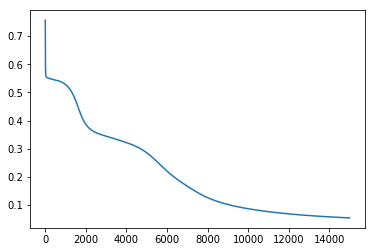

In [21]:
plt.plot(losses)

In [22]:
def accuracy(model,y,x):
    acc = np.sum(y==model.predic(x))/y.shape[0]
    return acc

In [23]:
print(accuracy(model,y,x))

0.976
